In [1]:
#neural net
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, TensorDataset

In [2]:
train = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_filter = np.isin(train.targets, [1, 2])
test_filter = np.isin(test.targets, [1,2])

train.data = train.data[train_filter]
train.targets = train.targets[train_filter]

test.data = test.data[test_filter]
test.test = test.targets[test_filter]


batch_train = 8
batch_test = 8
train_loader = DataLoader(train, batch_size=batch_train)
test_loader = DataLoader(test, batch_size=batch_test)

/home/emil/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# first data point in training
train.data[0,:,:].size()

torch.Size([28, 28])

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(image_batch, one_channel=False):
    if one_channel:
        image_batch = image_batch.mean(dim=0)
    image_batch = image_batch / 2 + 0.5     # unnormalize
    npimg = image_batch.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

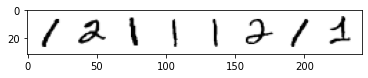

In [5]:
dataiter = iter(train_loader)

images, labels = dataiter.next()

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)

matplotlib_imshow(img_grid, one_channel=True)

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential( 
            
            # 1 x 28 x 28
            nn.Conv2d(1, 3, (3,3)), 
            # 3 x 26 x 26
            nn.BatchNorm2d(3),
            nn.Sigmoid(),           
            nn.MaxPool2d((2,2)),
            # 3 x 13 x 13
            nn.Conv2d(3, 5, (5,5)), 
            # 5 x 9 x 9
            nn.BatchNorm2d(5),
            nn.Sigmoid(),           
            nn.MaxPool2d((3,3)),
            # 5 x 3 x 3

            
            nn.Flatten(),
            nn.Linear(45,1)
        )
    
    def forward(self, x):
        return self.network(x)

In [7]:
model = CNN()
# for batch in enumerate(train_loader, 0):
#     i, data = batch
#     inputs, labels = data
#     print(model(inputs))


In [8]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

472